In [3]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import datasets,decomposition,manifold
import sklearn.neighbors as nb
import scipy.io as sio
import struct
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

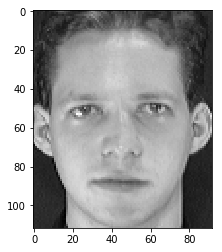

In [4]:
def loadPGM(name):
    
    original_data_file = open(name,"rb")
    data_buff = original_data_file.read()


    data_index = 0
    s = struct.unpack_from('>14c',data_buff, data_index)
    data_index += struct.calcsize('>14c')

    m = struct.unpack_from('>10304B',data_buff, data_index)
    m = np.mat(m)
 
    return m



data = loadPGM("orl_faces/s1/1.pgm")
data = data.reshape(112, 92)
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(data, cmap='gray')
plt.show()


(400, 1024)


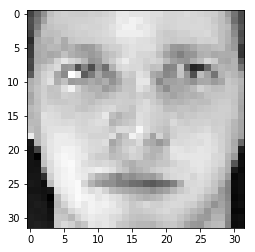

In [5]:
data=sio.loadmat("faces/ORL_32x32.mat")
face = data['fea']
label = data['gnd']
print(face.shape)

image = face[0]
image = image.reshape(32, 32)
image = image.T
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
def NPE(data, k, d):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    print("computing weights")
    data = np.matrix(data)
   
    N = data.shape[0]
    D = data.shape[1]
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    
    sort_index = np.argsort(distance,axis=1)

    # k nearest neibors
    neibors = sort_index[:,1:k+1]

    # step 2
    # weights
    
    W = np.zeros((N, N))
    
    # Gram Matrix
    
    if(k > D):
        add = 0.001
    else:
        add = 0.000001
    
    for i in range(N):
        neibors_i = neibors[i].A[0]
        G = data[neibors_i[:]] - data[i] 
        G = np.dot(G, G.T)
        G = G + add * np.dot(np.eye(k), np.trace(G))
        G_I = G.I
        w_i = np.sum(G_I,axis=1) / np.sum(G_I)
        w_i = w_i.flatten([0])    
        W[i][neibors[i]]=w_i
    
    # Step 3
    # M 
    
    print("computing M")
    M=np.eye(N,N) - W
    M=np.dot(M.T, M)
    print("computing eig")
    
    X = np.dot(np.dot(data.T, data).I, np.dot(np.dot(data.T, M), data))
    eig_values, eig_vectors = np.linalg.eig(X)

    eig_index = np.argsort(eig_values)
    eig_index = eig_index[0:d]
    mapping = np.mat(eig_vectors[:,eig_index])
    mapping = mapping
    print("mapping done")

    return mapping

In [ ]:
def feature_face():
    data=np.zeros((400, 10304))
    print(data.shape)
    for i in range(40):
        for j in range(10):
            data[i*10+j]=loadPGM("orl_faces/s"+str(i+1)+"/"+str(j+1)+".pgm")
    print(data)
    mapping = NPE(data, 5, 50*50)
    print(mapping.shape)
    tmp = mapping[0]
    tmp=(tmp-tmp.min())*(1/(tmp.max()-tmp.min()))*255
    tmp=tmp.astype(int)
    tmp=tmp.reshape(50, 50)
    fig = plt.figure()
    plotwindow = fig.add_subplot(111)
    plt.imshow(tmp.T, cmap='gray')
    plt.show()
    
feature_face()

(400, 10304)
[[  48.   49.   45. ...,   47.   46.   46.]
 [  60.   60.   62. ...,   32.   34.   34.]
 [  39.   44.   53. ...,   29.   26.   29.]
 ..., 
 [ 125.  119.  124. ...,   36.   39.   40.]
 [ 119.  120.  120. ...,   89.   94.   85.]
 [ 125.  124.  124. ...,   36.   35.   34.]]
computing weights
computing M
computing eig

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


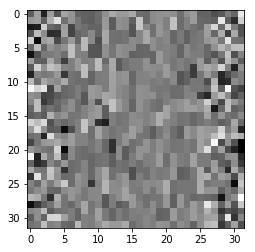

In [143]:
mapping = NPE(face, 10, 32*32)
print(mapping.shape)

tmp = mapping[0]
tmp=(tmp-tmp.min())*(1/(tmp.max()-tmp.min()))*255
tmp=tmp.astype(int)
tmp=tmp.reshape(32, 32)
fig = plt.figure()
plotwindow = fig.add_subplot(111)
plt.imshow(tmp.T, cmap='gray')
plt.show()

In [ ]:
for i in range(400):
    